In [1]:
import pandas as pd
import os
from matplotlib import pyplot
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go



In [2]:
filename1 = "restaurant-menus.csv"
filename2 = "restaurants.csv"

file_path1 = os.path.join(os.path.abspath(""), filename1)

file_path2 = os.path.join(os.path.abspath(""), filename2)

menus = pd.read_csv(file_path1)
restaurants = pd.read_csv(file_path2)

In [3]:
restaurants

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700
...,...,...,...,...,...,...,...,...,...,...,...
40222,40223,54,Mangia la pasta! (5610 N Interstate Hwy 35),4.8,500.0,"Pasta, Comfort Food, Italian, Group Friendly",$,"5610 N I35, Austin, TX, 78751",78751,30.316248,-97.708441
40223,40224,53,Wholly Cow Burgers (S Lamar),4.6,245.0,"American, Burgers, Breakfast and Brunch, Aller...",$,"3010 S Lamar Blvd, Austin, TX, 78704",78704,30.242816,-97.783821
40224,40225,52,EurAsia Ramen 3,4.7,293.0,"Sushi, Asian, Japanese, Exclusive to Eats, Gro...",$,"5222 Burnet Road, Austin, TX, 78756",78756,30.324290,-97.740200
40225,40226,51,Austin's Habibi (5th St),4.7,208.0,"Mediterranean, Gluten Free Friendly, Allergy F...",$$,"817 W 5th St, Austin, TX, 78703",78703,30.269580,-97.753110


In [4]:
#Tworzę data_frame, w którym będę miała tylko 4 kolumny: id, position, lat i long
geo_restaurant = restaurants.drop(['full_address', 'zip_code', 'name', 'score', 'ratings', 'category', 'price_range'], axis=1)
geo_restaurant

,id,position,lat,lng
0,1,19,33.562365,-86.830703
1,2,9,33.583640,-86.773330
2,3,6,33.509800,-86.854640
3,4,17,33.404439,-86.806614
4,5,162,33.514730,-86.811700
...,...,...,...,...
40222,40223,54,30.316248,-97.708441
40223,40224,53,30.242816,-97.783821
40224,40225,52,30.324290,-97.740200
40225,40226,51,30.269580,-97.753110


In [5]:
#Sortuję te dane, by zobaczyć czy jest kilka restay=uracji z tą samą pozycją 
geo_restaurant.sort_values("position", ascending=True, inplace=False, ignore_index=False)

,id,position,lat,lng
16404,16405,1,46.733090,-117.028120
37499,37500,1,32.541780,-94.748820
13573,13574,1,47.096640,-120.678890
13572,13573,1,46.999860,-120.548666
16537,16538,1,47.720030,-117.410780
...,...,...,...,...
39460,39461,300,30.273938,-97.744745
10954,10955,300,45.562880,-122.680900
39463,39464,300,30.418233,-97.702144
7699,7700,300,47.661601,-122.332036


In [22]:
#Tworzę mapkę Stanów Zjednoczonych, kolory mówią o pozycji danej restauracji 

fig = go.Figure(data=go.Scattergeo(
        lon = geo_restaurant['lng'],
        lat = geo_restaurant['lat'],
        mode = 'markers',
        marker = dict(
            size = 5,
            opacity = 0.3,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            colorscale = 'Reds',
            cmin = geo_restaurant['position'].max(),
        color = geo_restaurant['position'],
        cmax = geo_restaurant['position'].min(),
            colorbar_title="Position"
        )))

fig.update_layout(
        title = 'Position of restaurants',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.7,
            subunitwidth = 0.7
        ),
    )
fig.show()


In [6]:
no_nan = restaurants.drop(['full_address', 'zip_code', 'category','price_range'], axis=1)

In [7]:
no_nan = no_nan.dropna()
no_nan

,id,position,name,score,ratings,lat,lng
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,33.514730,-86.811700
6,7,27,Jinsei Sushi,4.7,63.0,33.480440,-86.790440
13,14,51,Panera (521 Fieldstown Road),4.6,44.0,33.651407,-86.819247
15,16,88,Jeni's Splendid Ice Cream (Pepper Place),5.0,20.0,33.516600,-86.789950
18,19,30,Falafel Cafe,4.9,48.0,33.508353,-86.803170
...,...,...,...,...,...,...,...
40222,40223,54,Mangia la pasta! (5610 N Interstate Hwy 35),4.8,500.0,30.316248,-97.708441
40223,40224,53,Wholly Cow Burgers (S Lamar),4.6,245.0,30.242816,-97.783821
40224,40225,52,EurAsia Ramen 3,4.7,293.0,30.324290,-97.740200
40225,40226,51,Austin's Habibi (5th St),4.7,208.0,30.269580,-97.753110


In [8]:
#Badam, czy są jakieś korelacje pomiędzy pozycją, scorem i ratingiem 
#Najpierw badam korelację liniową 
no_nan.corr('pearson')


,id,position,score,ratings,lat,lng
id,1.000000,0.100006,-0.011232,0.060802,-0.684075,0.210733
position,0.100006,1.000000,0.087547,0.018129,0.003132,-0.052655
score,-0.011232,0.087547,1.000000,0.172997,0.049121,-0.015955
ratings,0.060802,0.018129,0.172997,1.000000,-0.055226,0.083184
lat,-0.684075,0.003132,0.049121,-0.055226,1.000000,-0.605165
lng,0.210733,-0.052655,-0.015955,0.083184,-0.605165,1.000000


<AxesSubplot:>

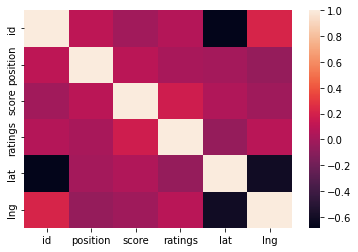

In [9]:
sns.heatmap(no_nan.corr('pearson'))

In [9]:
#potem sprawdza, czy istnieje może jakaś korelacja Spearmana(nie musi być liniowa)
no_nan.corr('spearman')


,id,position,score,ratings,lat,lng
id,1.000000,0.129468,-0.018658,0.045951,-0.705967,0.217873
position,0.129468,1.000000,0.111457,0.006412,-0.006842,-0.028242
score,-0.018658,0.111457,1.000000,0.148760,0.074411,-0.003210
ratings,0.045951,0.006412,0.148760,1.000000,-0.010175,0.041750
lat,-0.705967,-0.006842,0.074411,-0.010175,1.000000,-0.531392
lng,0.217873,-0.028242,-0.003210,0.041750,-0.531392,1.000000


<AxesSubplot:>

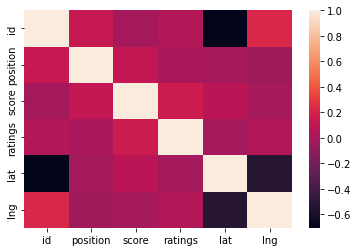

In [11]:
sns.heatmap(no_nan.corr('spearman'))

In [28]:
no_nan.corr('kendall')

,id,position,score,ratings,lat,lng
id,1.000000,0.085095,-0.013489,0.031051,-0.477709,0.129491
position,0.085095,1.000000,0.079148,0.004260,-0.005351,-0.019437
score,-0.013489,0.079148,1.000000,0.108632,0.052592,-0.002425
ratings,0.031051,0.004260,0.108632,1.000000,-0.006491,0.027010
lat,-0.477709,-0.005351,0.052592,-0.006491,1.000000,-0.303440
lng,0.129491,-0.019437,-0.002425,0.027010,-0.303440,1.000000


<AxesSubplot:>

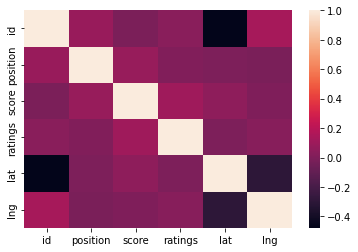

In [12]:
sns.heatmap(no_nan.corr('kendall'))

In [10]:
#Żeby zrobić mapę z top 20 restauracji pod kątem pozycji wyświelenia, score oraz ratingiem wówczas 
#sortuję Nasze dane po tych kolumnach 
top20 = no_nan.sort_values(['ratings', 'score'], ascending=False, inplace=False, ignore_index=True).head(20)
top20

,id,position,name,score,ratings,lat,lng
0,18969,102,Bethesda Bagels (Rosslyn),4.9,500.0,38.896494,-77.071272
1,19376,110,Grazie Grazie,4.9,500.0,38.879802,-77.025330
2,19414,283,Prescription Chicken (D.C.),4.9,500.0,38.914800,-77.021720
3,19517,125,Cracked Eggery (Cleveland Park),4.9,500.0,38.934731,-77.058372
4,19523,113,Isshin Asian Bistro (Originally Wok and Roll 1...,4.9,500.0,38.921230,-77.042500
5,19731,134,Poke It Up - Arlington,4.9,500.0,38.882326,-77.114002
6,19735,129,Poki DC &amp; Gong Cha (14th St),4.9,500.0,38.899937,-77.031710
7,19952,58,Taco Bamba (Falls Church),4.9,500.0,38.901970,-77.205520
8,19965,47,Hamilton Liquors (5205 Georgia Ave NW),4.9,500.0,38.953170,-77.027290
9,20326,36,Umi Japanese Cuisine,4.9,500.0,38.924291,-77.051522


In [11]:
top20.sort_values(['position'], ascending=True)

,id,position,name,score,ratings,lat,lng
17,32779,8,Jetson🛒,4.9,500.0,18.429709,-66.072322
13,28693,14,Filomena Ristorante (Georgetown),4.9,500.0,38.904398,-77.062519
18,18313,31,Taco Bamba (Springfield),4.8,500.0,38.773030,-77.183680
9,20326,36,Umi Japanese Cuisine,4.9,500.0,38.924291,-77.051522
8,19965,47,Hamilton Liquors (5205 Georgia Ave NW),4.9,500.0,38.953170,-77.027290
7,19952,58,Taco Bamba (Falls Church),4.9,500.0,38.901970,-77.205520
0,18969,102,Bethesda Bagels (Rosslyn),4.9,500.0,38.896494,-77.071272
1,19376,110,Grazie Grazie,4.9,500.0,38.879802,-77.025330
4,19523,113,Isshin Asian Bistro (Originally Wok and Roll 1...,4.9,500.0,38.921230,-77.042500
19,19026,113,Taco Bamba (Arlington),4.8,500.0,38.879740,-77.107610


In [13]:
fig = go.Figure(data=go.Scattergeo(
        lon = top20['lng'],
        lat = top20['lat'],
        mode = 'markers',
        marker = dict(
            size = 5,
            opacity = 0.5,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            colorscale = 'blues',
            cmin = top20['position'].max(),
        color = top20['position'],
        cmax = top20['position'].min(),
            colorbar_title="Position"
        )))

fig.update_layout(
        title = 'TOP20 of restaurants',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.7,
            subunitwidth = 0.7
        ),
    )
fig.show()